### Descrição dos Arquivos

dataset_treino.csv - contém o conjunto de dados de treinamento  
dataset_teste.csv - contém o conjunto de dados de teste  
sampleSubmission.csv - contém o template para você enviar a sua solução  

### Descrição dos Campos
num_gestacoes - Número de vezes grávida  
glicose - Concentração plasmática de glicose em teste oral de tolerância à glicose  
pressao_sanguinea - Pressão arterial diastólica em mm Hg  
grossura_pele - Espessura da dobra da pele do tríceps em mm  
insulina - Insulina em mu U / ml  
bmi - Índice de massa corporal medido em peso em kg / (altura em m) ^ 2  
indice_historico - Índice de histórico de diabetes (Pedigree Function)  
idade - Idade em anos  
classe - Classe (0 - não desenvolveu a doença / 1 - desenvolveu a doença)  

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [25]:
from pyspark.sql import functions as F, types as T

In [35]:
path = '/opt/dna-learn/laranja/stat/desafio/01-Jan-2019/'

df = spark.read.option("header", True).csv(f'{path}/dataset_treino.csv')

Tratando os dados

In [36]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- num_gestacoes: string (nullable = true)
 |-- glicose: string (nullable = true)
 |-- pressao_sanguinea: string (nullable = true)
 |-- grossura_pele: string (nullable = true)
 |-- insulina: string (nullable = true)
 |-- bmi: string (nullable = true)
 |-- indice_historico: string (nullable = true)
 |-- idade: string (nullable = true)
 |-- classe: string (nullable = true)



In [37]:
for c in df.columns:
    df = df.withColumn(c, F.col(c).cast('double'))

In [38]:
df.printSchema()

root
 |-- id: double (nullable = true)
 |-- num_gestacoes: double (nullable = true)
 |-- glicose: double (nullable = true)
 |-- pressao_sanguinea: double (nullable = true)
 |-- grossura_pele: double (nullable = true)
 |-- insulina: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- indice_historico: double (nullable = true)
 |-- idade: double (nullable = true)
 |-- classe: double (nullable = true)



In [51]:
df.describe().toPandas()

,summary,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,count,600,600,600,600,600,600,600,600,600,600
1,mean,300.5,3.82,120.135,68.68166666666667,20.558333333333334,79.52833333333334,31.905333333333292,0.481063333333333,33.278333333333336,0.3466666666666667
2,stddev,173.34935823359717,3.3620090980382766,32.65824617773705,19.360226268240897,16.004588153364654,116.49058312649477,8.009637656048545,0.3372840645844289,11.822315444093643,0.4763055747694784
3,min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
4,max,600.0,17.0,198.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0


### Gerando vetor de features

In [43]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

feature_cols = df.columns
feature_cols.remove('id')
feature_cols.remove('classe')

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

df = assembler.transform(df)
print(f"Assembled columns {str.join(',', [f'{c}' for c in feature_cols])} to vector column 'features'")
df.select("features", "classe").show(truncate=False)

Assembled columns num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade to vector column 'features'
+-------------------------------------------+------+
|features                                   |classe|
+-------------------------------------------+------+
|[6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0]  |1.0   |
|[1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0]   |0.0   |
|[8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0]   |1.0   |
|[1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0]  |0.0   |
|[0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0]|1.0   |
|[5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0]   |0.0   |
|[3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0]  |1.0   |
|[10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0]   |0.0   |
|[2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0]|1.0   |
|[8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0]    |1.0   |
|[4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0]   |0.0   |
|[10.0,168.0,74.0,0.0,0.0,38.0,0.537,34.0]  |1.0   |
|[10.0,139.0,80.0,0.0,0.0,27.1,1.441,57.0]  |0.0   |
|[1.0,189.0,60.0

### Regressor baseline

### Desenhos bonitinhos

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

pdf = df.drop('id').toPandas()

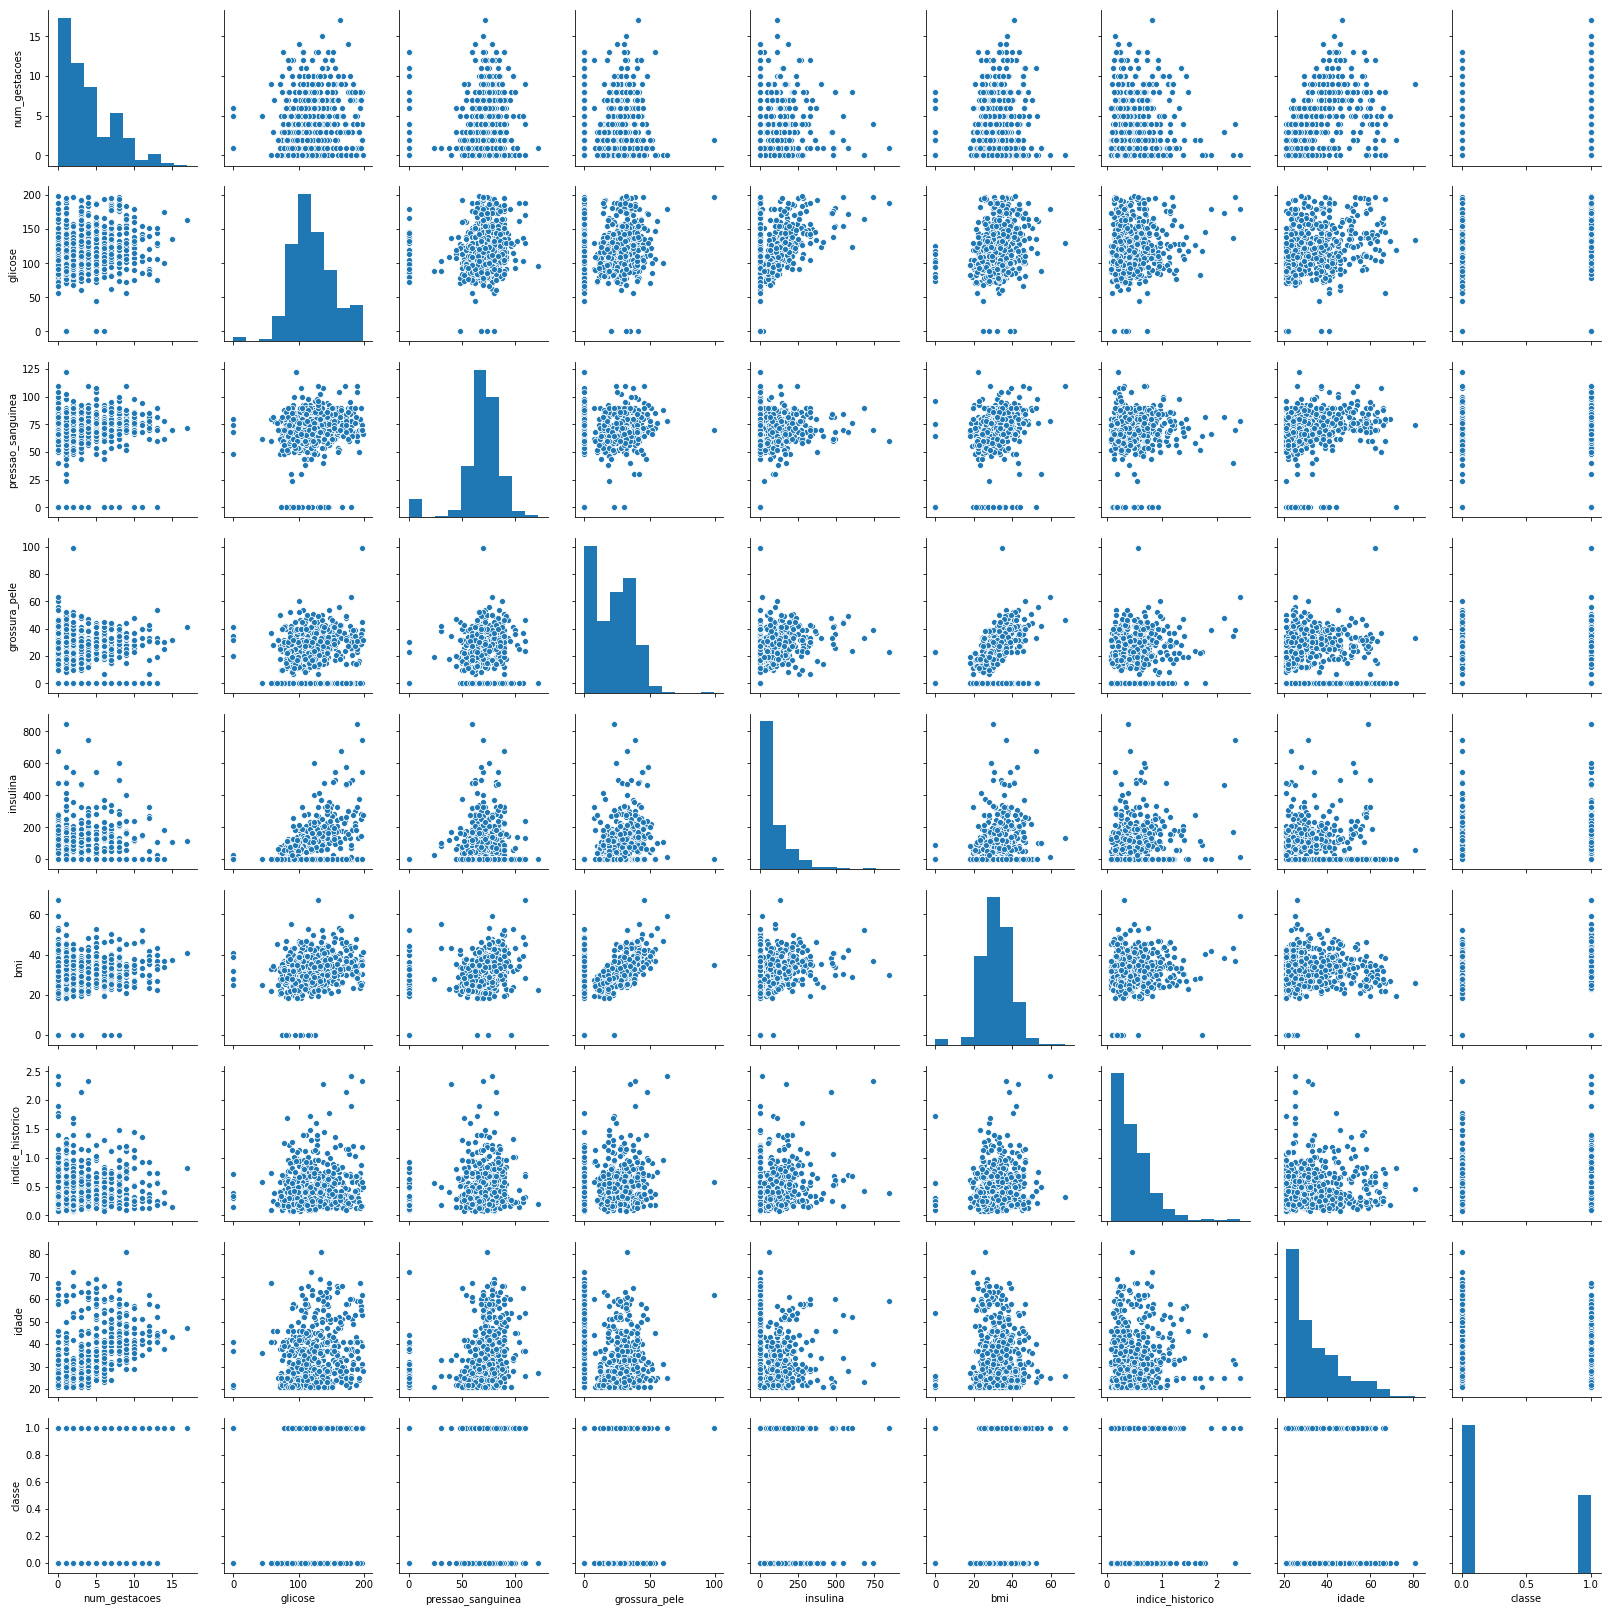

In [63]:
sns_plot = sns.pairplot(pdf)

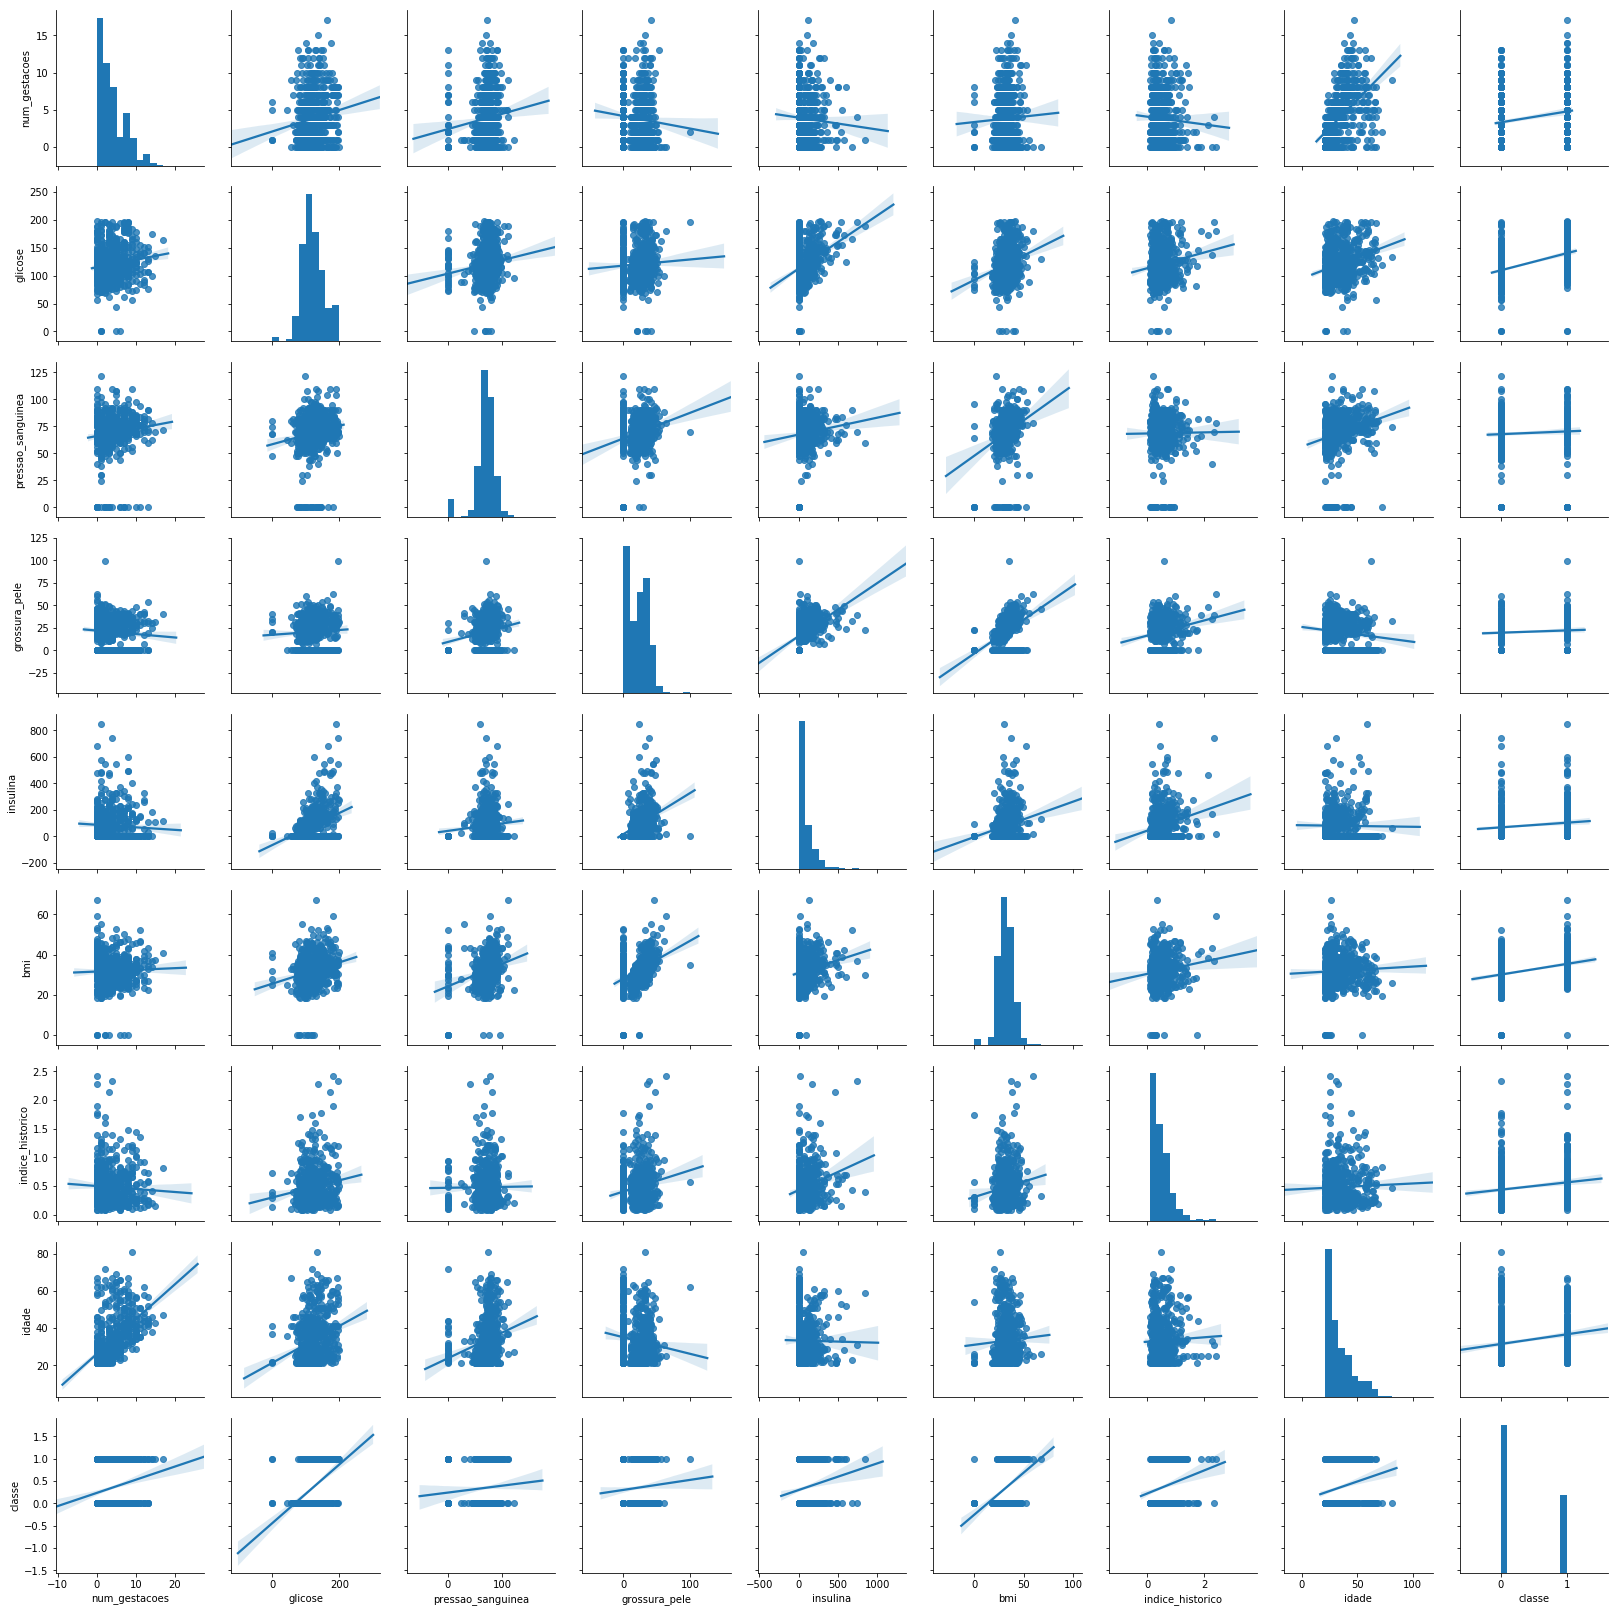

In [64]:
sns.pairplot(pdf, kind="reg")

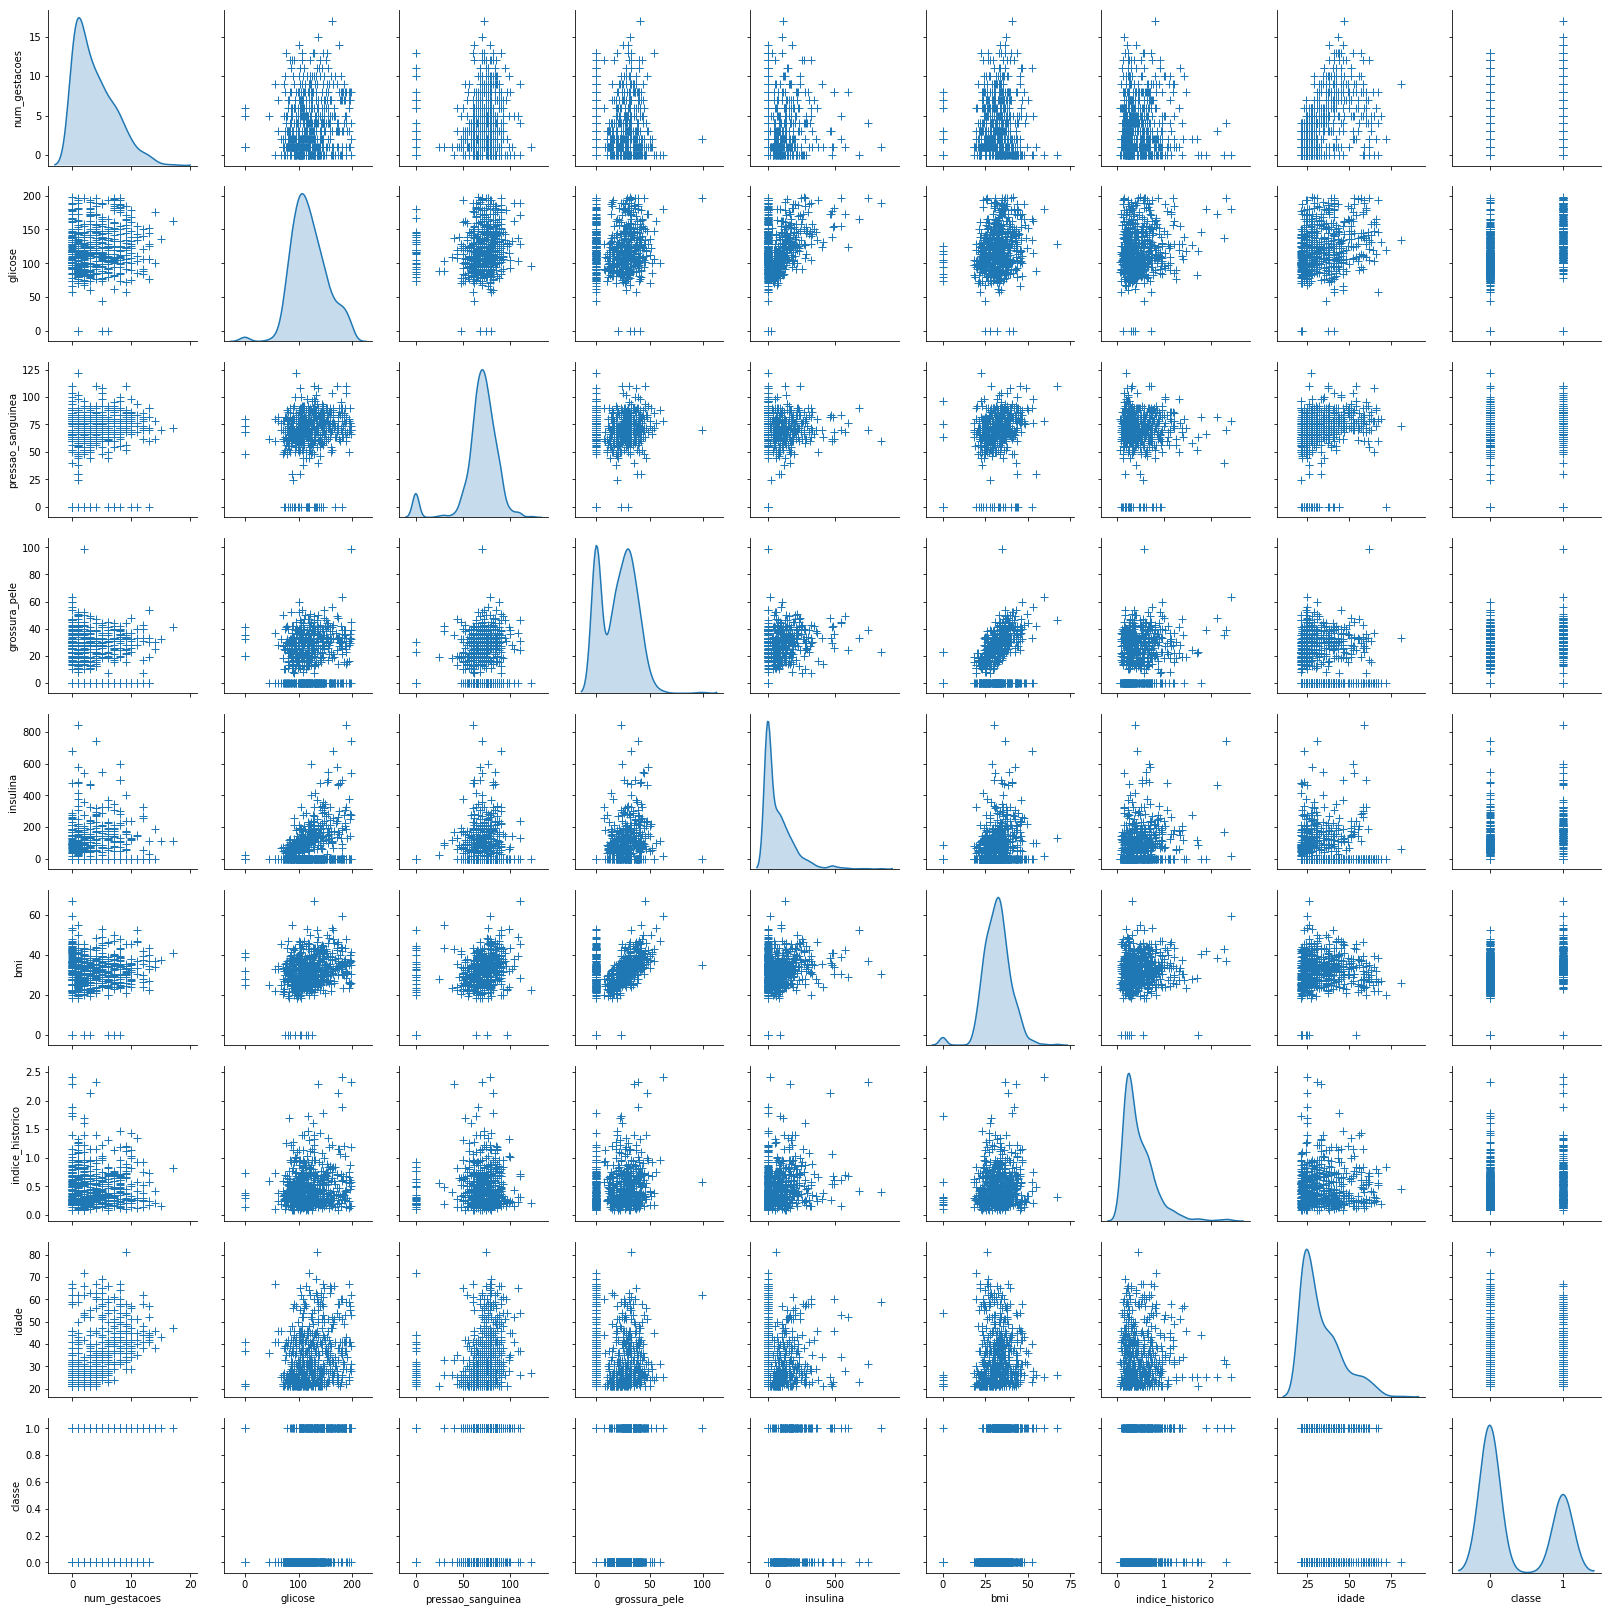

In [65]:
sns.pairplot(pdf, diag_kind="kde", markers="+",
    plot_kws=dict(s=50, edgecolor="b", linewidth=1),
    diag_kws=dict(shade=True))

### PCA

In [45]:
from pyspark.ml.feature import PCA as PCAml

pca_model = PCAml(k=2, inputCol="features", outputCol="pca").fit(df)
pca_transformed = model.transform(df)

In [48]:
pca_transformed.select('features','pca').limit(10).toPandas()

,features,pca
0,"[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]","[18.691951580272384, -159.494534794687]"
1,"[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0]","[11.772960890077272, -94.69232564244982]"
2,"[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0]","[19.905798684962782, -191.90003868133064]"
3,"[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0]","[105.17616073385764, -88.4121542680465]"
4,"[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 3...","[183.98268638511075, -126.24532529556323]"
5,"[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0]","[13.31579814207023, -127.61510743696284]"
6,"[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0]","[98.40113074623223, -76.60108478558459]"
7,"[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0]","[12.095084337333937, -117.88455816397669]"
8,"[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 5...","[563.303120044588, -153.13367100391773]"
9,"[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0]","[14.245998300882038, -141.31154482228538]"
